<a href="https://colab.research.google.com/github/Daps2831/Machine-Learning/blob/main/UAS/Klasifikasi_csv_UAS_Daffa_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount File

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Ganti path sesuai lokasi file di Google Drive
# note: dataset obesity_level diambil dari kaggle
file_path = "/content/drive/MyDrive/Dataset/KlasifikasiUTS.csv"
# Membaca file Excel
df = pd.read_csv(file_path)



# EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Tampilkan 5 baris pertama untuk melihat sampel data
print("Sampel Data:")
print(df.head())

# Dapatkan informasi ringkas tentang tipe data dan non-null values
print("\nInfo Dataset:")
df.info()

# Dapatkan statistik deskriptif untuk kolom numerik
print("\nStatistik Deskriptif:")
print(df.describe())

Sampel Data:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V

In [ ]:
# Hitung jumlah nilai null di setiap kolom
print("\nJumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())


Jumlah Nilai Hilang per Kolom:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64



Distribusi Kelas Target:
Class
0    284315
1       492
Name: count, dtype: int64


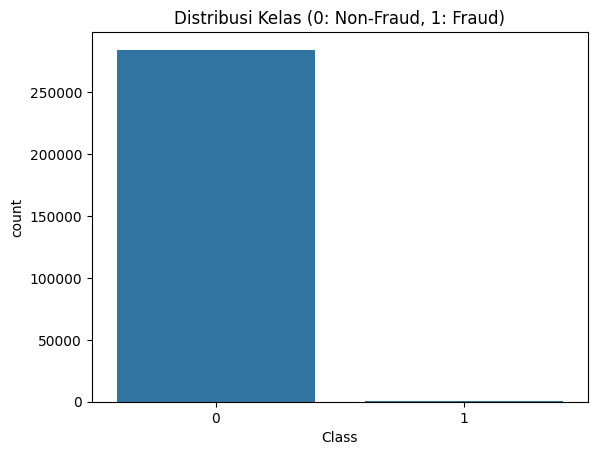


Persentase transaksi fraud: 0.173%


In [ ]:
# Periksa distribusi kelas target
print("\nDistribusi Kelas Target:")
class_counts = df['Class'].value_counts()
print(class_counts)

# Visualisasikan distribusi kelas
sns.countplot(x='Class', data=df)
plt.title('Distribusi Kelas (0: Non-Fraud, 1: Fraud)')
plt.show()

# Hitung persentasenya
fraud_percentage = (class_counts[1] / class_counts.sum()) * 100
print(f"\nPersentase transaksi fraud: {fraud_percentage:.3f}%")

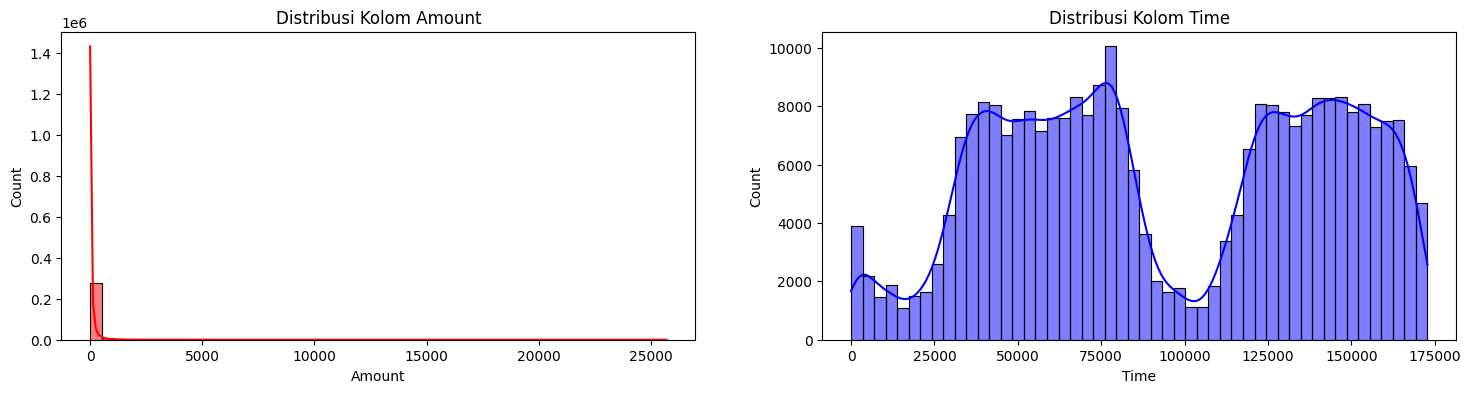

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

sns.histplot(df['Amount'], ax=ax[0], color='r', bins=50, kde=True)
ax[0].set_title('Distribusi Kolom Amount')

sns.histplot(df['Time'], ax=ax[1], color='b', bins=50, kde=True)
ax[1].set_title('Distribusi Kolom Time')

plt.show()

# Feature Engineering & Preprocessing

## 1. Penskalaan Fitur (Feature Scaling)

Karena model deep learning (dan banyak model ML lainnya) sensitif terhadap skala input, kita perlu menskalakan kolom Amount dan Time. Mengingat Amount memiliki banyak outlier (sangat miring), menggunakan RobustScaler dari Scikit-learn adalah pilihan yang lebih baik daripada StandardScaler. RobustScaler menggunakan median dan rentang interkuartil, sehingga lebih tahan terhadap outlier.

In [ ]:
from sklearn.preprocessing import RobustScaler

# Buat objek RobustScaler
rob_scaler = RobustScaler()

# Buat kolom baru untuk nilai yang sudah diskalakan
# Kita menggunakan .values.reshape(-1, 1) karena scaler mengharapkan input 2D
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Hapus kolom 'Time' dan 'Amount' yang asli karena sudah tidak diperlukan
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Susun ulang kolom agar lebih rapi (opsional, tapi disarankan)
# Pindahkan kolom yang baru kita buat ke depan dan 'Class' ke paling belakang
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

print("Data setelah penskalaan dan penyusunan ulang kolom:")
print(df.head())

Data setelah penskalaan dan penyusunan ulang kolom:
   scaled_amount  scaled_time        V1        V2        V3        V4  \
0       1.783274    -0.994983 -1.359807 -0.072781  2.536347  1.378155   
1      -0.269825    -0.994983  1.191857  0.266151  0.166480  0.448154   
2       4.983721    -0.994972 -1.358354 -1.340163  1.773209  0.379780   
3       1.418291    -0.994972 -0.966272 -0.185226  1.792993 -0.863291   
4       0.670579    -0.994960 -1.158233  0.877737  1.548718  0.403034   

         V5        V6        V7        V8  ...       V20       V21       V22  \
0 -0.338321  0.462388  0.239599  0.098698  ...  0.251412 -0.018307  0.277838   
1  0.060018 -0.082361 -0.078803  0.085102  ... -0.069083 -0.225775 -0.638672   
2 -0.503198  1.800499  0.791461  0.247676  ...  0.524980  0.247998  0.771679   
3 -0.010309  1.247203  0.237609  0.377436  ... -0.208038 -0.108300  0.005274   
4 -0.407193  0.095921  0.592941 -0.270533  ...  0.408542 -0.009431  0.798278   

        V23       V24       

## 2. Memisahkan Data (Train-Test Split)

Sekarang kita pisahkan data menjadi set pelatihan (untuk melatih model) dan set pengujian (untuk mengevaluasi model pada data yang belum pernah dilihat).

PENTING: Karena data kita sangat tidak seimbang, kita wajib menggunakan parameter stratify=y. Ini memastikan bahwa proporsi kelas fraud/non-fraud di set pelatihan dan pengujian sama dengan proporsi di dataset asli. Tanpa ini, ada risiko set pengujian kita tidak memiliki sampel fraud sama sekali.

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
# X adalah semua kolom KECUALI 'Class'
X = df.drop('Class', axis=1)
# y adalah HANYA kolom 'Class'
y = df['Class']

# Lakukan splitting dengan rasio 80:20 dan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Konversi ke numpy array agar kompatibel dengan TensorFlow/PyTorch
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


# Mari kita verifikasi bahwa stratifikasi bekerja
print(f"Bentuk X_train: {X_train.shape}")
print(f"Bentuk X_test: {X_test.shape}")

unique_train, counts_train = np.unique(y_train, return_counts=True)
unique_test, counts_test = np.unique(y_test, return_counts=True)

print("\nDistribusi kelas di set pelatihan:")
print(dict(zip(unique_train, counts_train)))
# Output akan sekitar: {0: 227451, 1: 394}

print("\nDistribusi kelas di set pengujian:")
print(dict(zip(unique_test, counts_test)))
# Output akan sekitar: {0: 56864, 1: 98}

Bentuk X_train: (227845, 30)
Bentuk X_test: (56962, 30)

Distribusi kelas di set pelatihan:
{np.int64(0): np.int64(227451), np.int64(1): np.int64(394)}

Distribusi kelas di set pengujian:
{np.int64(0): np.int64(56864), np.int64(1): np.int64(98)}


## 3. Menangani Ketidakseimbangan Data: Class Weighting

Model yang dilatih pada data yang sangat tidak seimbang akan cenderung "malas" dan hanya memprediksi kelas mayoritas (non-fraud) untuk mendapatkan akurasi tinggi. Kita harus mengatasi ini.

Ada beberapa cara (misalnya oversampling dengan SMOTE atau undersampling), tetapi untuk model deep learning, metode yang paling efisien dan umum adalah Class Weighting. Kita akan memberitahu model saat training: "Hey, jika kamu salah memprediksi kelas minoritas (fraud), hukumannya (loss) akan jauh lebih besar!".

Kita bisa menghitung bobot ini dengan mudah menggunakan Scikit-learn, lalu memasukkannya ke dalam model TensorFlow/PyTorch kita nanti.

In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Hitung bobot kelas agar seimbang
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Ubah menjadi format dictionary yang bisa digunakan TensorFlow/Keras
class_weights_dict = dict(enumerate(class_weights))

print(f"\nBobot Kelas yang akan digunakan: {class_weights_dict}")
# Output akan mirip seperti ini: {0: 0.50086, 1: 288.64}
# Ini berarti loss untuk kesalahan pada kelas 1 akan ~576x lebih besar daripada kesalahan pada kelas 0.


Bobot Kelas yang akan digunakan: {0: np.float64(0.5008661206149896), 1: np.float64(289.14340101522845)}


# Modelling

## Mengembangkan Arsitektur MLP (Multi-Layer Perceptron) dengan TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Pastikan variabel ini sudah ada dari langkah sebelumnya
# X_train, y_train, X_test, y_test
# class_weights_dict

# 1. MEMBANGUN ARSITEKTUR MODEL
# =================================

# Kita akan membuat model Sequential, yaitu tumpukan layer linear
model_tf = Sequential([
    # Input Layer dan Hidden Layer Pertama
    # Dense: Fully connected layer dengan 32 neuron
    # input_shape: Bentuk data input kita (30 fitur)
    # activation='relu': Fungsi aktivasi yang umum dan efektif
    # kernel_regularizer=l2(0.001): Menerapkan L2 weight decay
    Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),

    # Batch Normalization: Menormalkan output dari layer sebelumnya
    BatchNormalization(),

    # Dropout: Menonaktifkan 50% neuron secara acak selama training
    Dropout(0.5),

    # Hidden Layer Kedua
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),

    # Output Layer
    # Dense: 1 neuron karena ini adalah klasifikasi biner (Fraud atau Tidak)
    # activation='sigmoid': Menghasilkan output probabilitas antara 0 dan 1
    Dense(1, activation='sigmoid')
])

# Menampilkan ringkasan arsitektur model
print("Arsitektur Model TensorFlow:")
model_tf.summary()

Arsitektur Model TensorFlow:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,729 (6.75 KB)

 Trainable params: 1,633 (6.38 KB)

 Non-trainable params: 96 (384.00 B)

In [ ]:
# 2. MENGKOMPILASI MODEL
# ========================

# Tentukan optimizer dengan learning rate awal
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

# Tentukan metrik yang ingin kita pantau. AUC sangat penting untuk data tidak seimbang.
METRICS = [
    'accuracy',
    tf.keras.metrics.AUC(name='auc') # Area Under the ROC Curve
]

# Kompilasi model dengan optimizer, loss function, dan metrics
model_tf.compile(
    optimizer=optimizer,
    loss='binary_crossentropy', # Loss function standar untuk klasifikasi biner
    metrics=METRICS
)

In [ ]:
# 3. MEMPERSIAPKAN CALLBACKS DAN MELATIH MODEL
# =============================================

# EarlyStopping: Berhenti training jika 'val_auc' tidak membaik selama 5 epoch
# 'restore_best_weights=True' akan mengembalikan bobot model ke epoch terbaik
early_stopping = EarlyStopping(
    monitor='val_auc',
    mode='max', # Kita ingin memaksimalkan AUC
    patience=5,
    verbose=1,
    restore_best_weights=True
)

# ReduceLROnPlateau: Kurangi learning rate jika 'val_auc' tidak membaik
reduce_lr = ReduceLROnPlateau(
    monitor='val_auc',
    mode='max',
    factor=0.2, # Kurangi LR sebesar 80% (1 - 0.2)
    patience=2,
    verbose=1,
    min_lr=1e-6 # Learning rate minimum
)

# MELATIH MODEL!
# Kita menggunakan class_weights_dict yang sudah kita buat
history = model_tf.fit(
    X_train,
    y_train,
    epochs=50, # Jumlah epoch maksimal (kemungkinan akan berhenti lebih awal karena EarlyStopping)
    batch_size=2048, # Ukuran batch yang cukup besar untuk mempercepat training
    validation_data=(X_test, y_test),
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights_dict # Ini sangat penting untuk menangani imbalance!
)

print("\nPelatihan model TensorFlow selesai.")

Epoch 1/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6399 - auc: 0.8022 - loss: 0.6595 - val_accuracy: 0.8682 - val_auc: 0.9555 - val_loss: 0.5902 - learning_rate: 0.0010
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7635 - auc: 0.9008 - loss: 0.4891 - val_accuracy: 0.9593 - val_auc: 0.9691 - val_loss: 0.4164 - learning_rate: 0.0010
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8428 - auc: 0.9326 - loss: 0.4046 - val_accuracy: 0.9721 - val_auc: 0.9738 - val_loss: 0.3231 - learning_rate: 0.0010
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8925 - auc: 0.9556 - loss: 0.3485 - val_accuracy: 0.9782 - val_auc: 0.9773 - val_loss: 0.2718 - learning_rate: 0.0010
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9195 - auc: 0.9529 - loss: 0.3191 - val_accuracy: 0.9806 - val_auc: 0.9806 - val_loss: 0.2356 - learning_rate: 0.0010
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9347 - auc

## Evaluasi Model & Visualisasi Tensorflow

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step
Laporan Klasifikasi (Classification Report):
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.98      0.99     56864
    Fraud (1)       0.08      0.89      0.14        98

     accuracy                           0.98     56962
    macro avg       0.54      0.93      0.57     56962
 weighted avg       1.00      0.98      0.99     56962



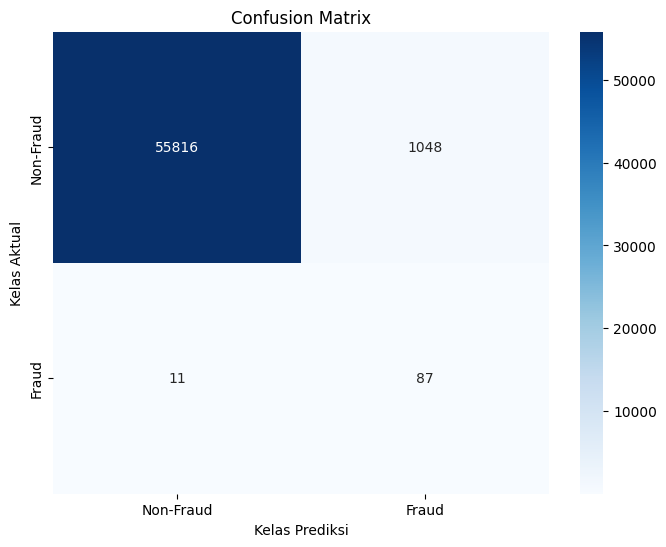

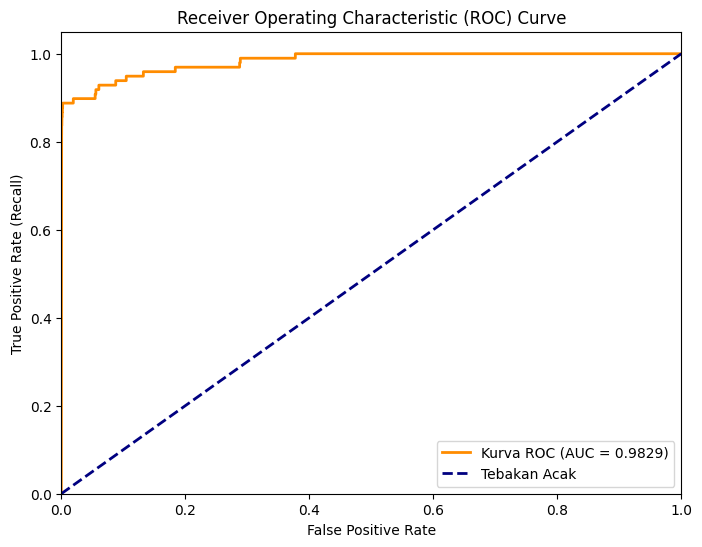

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# 1. MEMBUAT PREDIKSI PADA DATA TES
# ==================================
# Model akan menghasilkan probabilitas, kita perlu ubah ke kelas (0 atau 1)
y_pred_probs = model_tf.predict(X_test)
y_pred_classes = (y_pred_probs > 0.5).astype("int32").flatten() # Threshold 0.5

# Probabilitas untuk kelas positif (fraud), diperlukan untuk ROC curve
y_pred_fraud_probs = y_pred_probs.flatten()


# 2. MENGHITUNG MATRIKS EVALUASI
# ===============================
print("Laporan Klasifikasi (Classification Report):")
# 'target_names' untuk memberi label pada output
print(classification_report(y_test, y_pred_classes, target_names=['Non-Fraud (0)', 'Fraud (1)']))


# 3. VISUALISASI CONFUSION MATRIX
# ================================
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Kelas Aktual')
plt.xlabel('Kelas Prediksi')
plt.show()


# 4. VISUALISASI KURVA ROC & MENGHITUNG AUC
# ==========================================
# Hitung False Positive Rate, True Positive Rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred_fraud_probs)
# Hitung Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Kurva ROC (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Tebakan Acak')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Mengembangkan Model dengan PyTorch

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import roc_auc_score
import numpy as np

# 1. PERSIAPAN DATA UNTUK PYTORCH
# ================================
# PyTorch bekerja dengan Tensors. Kita konversi data numpy kita.
# Kita juga butuh float32 untuk data dan float32 untuk target loss.
X_train_t = torch.tensor(X_train, dtype=torch.float32)
y_train_t = torch.tensor(y_train, dtype=torch.float32).view(-1, 1) # reshape
X_test_t = torch.tensor(X_test, dtype=torch.float32)
y_test_t = torch.tensor(y_test, dtype=torch.float32).view(-1, 1) # reshape

# Buat DataLoader untuk memproses data dalam batch
train_dataset = TensorDataset(X_train_t, y_train_t)
train_loader = DataLoader(dataset=train_dataset, batch_size=2048, shuffle=True)

In [ ]:
# 2. MEMBANGUN ARSITEKTUR MODEL
# =============================
# Di PyTorch, kita mendefinisikan model sebagai sebuah class
class MLP(nn.Module):
    def __init__(self, input_features):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_features, 32)
        self.bn1 = nn.BatchNorm1d(32)
        self.dropout1 = nn.Dropout(0.5)

        self.layer2 = nn.Linear(32, 16)
        self.bn2 = nn.BatchNorm1d(16)
        self.dropout2 = nn.Dropout(0.5)

        self.output_layer = nn.Linear(16, 1)

    def forward(self, x):
        # Mendefinisikan alur data (forward pass)
        x = torch.relu(self.layer1(x))
        x = self.bn1(x)
        x = self.dropout1(x)

        x = torch.relu(self.layer2(x))
        x = self.bn2(x)
        x = self.dropout2(x)

        # Kita tidak menggunakan sigmoid di sini karena loss function di bawah
        # (BCEWithLogitsLoss) sudah mengaplikasikannya secara internal
        # dan lebih stabil secara numerik.
        x = self.output_layer(x)
        return x

# Inisialisasi model
model_pytorch = MLP(input_features=X_train.shape[1])
print("Arsitektur Model PyTorch:")
print(model_pytorch)

Arsitektur Model PyTorch:
MLP(
  (layer1): Linear(in_features=30, out_features=32, bias=True)
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout1): Dropout(p=0.5, inplace=False)
  (layer2): Linear(in_features=32, out_features=16, bias=True)
  (bn2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.5, inplace=False)
  (output_layer): Linear(in_features=16, out_features=1, bias=True)
)


In [ ]:
# 3. DEFINISIKAN LOSS FUNCTION DAN OPTIMIZER
# ==========================================
# Cara PyTorch menangani class imbalance adalah dengan 'pos_weight'
# Hitung bobot untuk kelas positif (fraud)
# weight = (jumlah sampel negatif / jumlah sampel positif)
weight_for_fraud = len(y_train[y_train==0]) / len(y_train[y_train==1])
pos_weight_tensor = torch.tensor([weight_for_fraud], dtype=torch.float32)

# BCEWithLogitsLoss lebih stabil dan bisa menerima pos_weight
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor)
optimizer = torch.optim.Adam(model_pytorch.parameters(), lr=1e-3, weight_decay=1e-3) # L2 reg = weight_decay


In [ ]:

# 4. LOOP PELATIHAN (TRAINING LOOP)
# ===================================
epochs = 11 # Kita samakan dengan jumlah epoch terbaik dari TensorFlow untuk perbandingan
print("\nMemulai Pelatihan Model PyTorch...")

for epoch in range(epochs):
    model_pytorch.train() # Set model ke mode training
    total_loss = 0

    for inputs, labels in train_loader:
        # Forward pass
        outputs = model_pytorch(inputs)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad() # Reset gradien
        loss.backward() # Hitung gradien (backpropagation)
        optimizer.step() # Update bobot

        total_loss += loss.item()

    # Evaluasi di akhir setiap epoch (pada data tes)
    model_pytorch.eval() # Set model ke mode evaluasi
    with torch.no_grad(): # Tidak perlu menghitung gradien saat evaluasi
        val_outputs = model_pytorch(X_test_t)
        # ubah output logits ke probabilitas menggunakan sigmoid
        val_probs = torch.sigmoid(val_outputs)
        val_auc = roc_auc_score(y_test_t.numpy(), val_probs.numpy())
        val_loss = criterion(val_outputs, y_test_t).item()

    print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {total_loss/len(train_loader):.4f}, Val Loss: {val_loss:.4f}, Val AUC: {val_auc:.4f}')

print("\nPelatihan model PyTorch selesai.")


Memulai Pelatihan Model PyTorch...
Epoch [1/11], Train Loss: 1.0324, Val Loss: 0.6597, Val AUC: 0.9524
Epoch [2/11], Train Loss: 0.7689, Val Loss: 0.5525, Val AUC: 0.9600
Epoch [3/11], Train Loss: 0.6547, Val Loss: 0.4787, Val AUC: 0.9649
Epoch [4/11], Train Loss: 0.5393, Val Loss: 0.4196, Val AUC: 0.9699
Epoch [5/11], Train Loss: 0.4800, Val Loss: 0.3774, Val AUC: 0.9737
Epoch [6/11], Train Loss: 0.4565, Val Loss: 0.3568, Val AUC: 0.9746
Epoch [7/11], Train Loss: 0.4297, Val Loss: 0.3391, Val AUC: 0.9775
Epoch [8/11], Train Loss: 0.3994, Val Loss: 0.3250, Val AUC: 0.9775
Epoch [9/11], Train Loss: 0.3563, Val Loss: 0.3305, Val AUC: 0.9777
Epoch [10/11], Train Loss: 0.3461, Val Loss: 0.3207, Val AUC: 0.9792
Epoch [11/11], Train Loss: 0.3447, Val Loss: 0.3249, Val AUC: 0.9785

Pelatihan model PyTorch selesai.


## Evaluasi Model & Visualisasi PyTorch

Laporan Klasifikasi (Classification Report) - Model PyTorch:
               precision    recall  f1-score   support

Non-Fraud (0)       1.00      0.98      0.99     56864
    Fraud (1)       0.07      0.91      0.14        98

     accuracy                           0.98     56962
    macro avg       0.54      0.94      0.56     56962
 weighted avg       1.00      0.98      0.99     56962



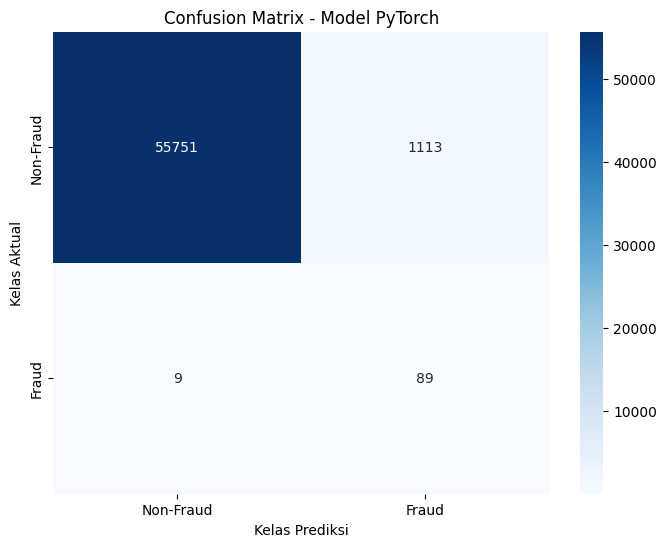

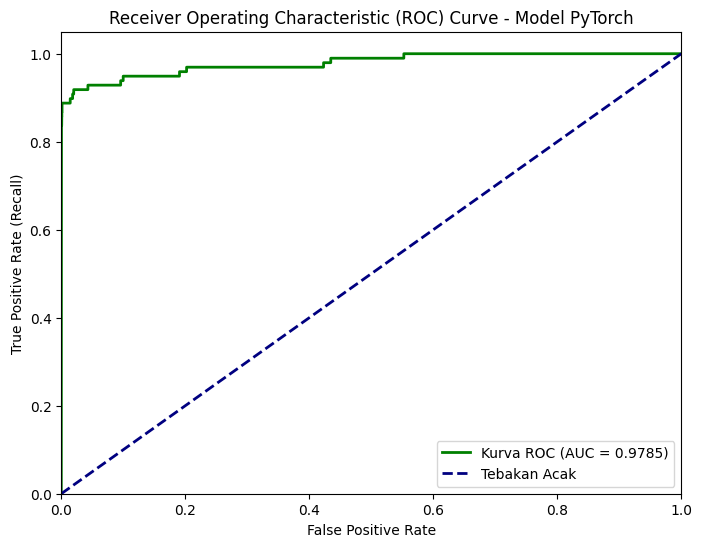

In [ ]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Pastikan variabel ini ada dari langkah sebelumnya
# model_pytorch, X_test_t, y_test

# 1. MEMBUAT PREDIKSI DENGAN MODEL PYTORCH
# =========================================
model_pytorch.eval() # Set model ke mode evaluasi
with torch.no_grad(): # Matikan perhitungan gradien
    # Dapatkan output mentah (logits) dari model
    y_pred_logits = model_pytorch(X_test_t)

    # Konversi logits ke probabilitas menggunakan Sigmoid
    y_pred_probs_pytorch = torch.sigmoid(y_pred_logits)

    # Konversi ke kelas (0 atau 1) dengan threshold 0.5
    y_pred_classes_pytorch = (y_pred_probs_pytorch > 0.5).int()

# Konversi tensor PyTorch ke array numpy agar bisa digunakan oleh Scikit-learn
y_pred_probs_numpy = y_pred_probs_pytorch.numpy().flatten()
y_pred_classes_numpy = y_pred_classes_pytorch.numpy().flatten()
y_test_numpy = y_test # y_test sudah dalam format numpy


# 2. MENGHITUNG MATRIKS EVALUASI (Kode sama persis seperti sebelumnya)
# ===================================================================
print("Laporan Klasifikasi (Classification Report) - Model PyTorch:")
print(classification_report(y_test_numpy, y_pred_classes_numpy, target_names=['Non-Fraud (0)', 'Fraud (1)']))


# 3. VISUALISASI CONFUSION MATRIX (Kode sama persis)
# ===================================================
cm_pytorch = confusion_matrix(y_test_numpy, y_pred_classes_numpy)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_pytorch, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraud', 'Fraud'],
            yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Confusion Matrix - Model PyTorch')
plt.ylabel('Kelas Aktual')
plt.xlabel('Kelas Prediksi')
plt.show()


# 4. VISUALISASI KURVA ROC & MENGHITUNG AUC (Kode sama persis)
# ============================================================
fpr_pytorch, tpr_pytorch, _ = roc_curve(y_test_numpy, y_pred_probs_numpy)
roc_auc_pytorch = auc(fpr_pytorch, tpr_pytorch)

plt.figure(figsize=(8, 6))
plt.plot(fpr_pytorch, tpr_pytorch, color='green', lw=2, label=f'Kurva ROC (AUC = {roc_auc_pytorch:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Tebakan Acak')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve - Model PyTorch')
plt.legend(loc="lower right")
plt.show()

# Perbandingan model

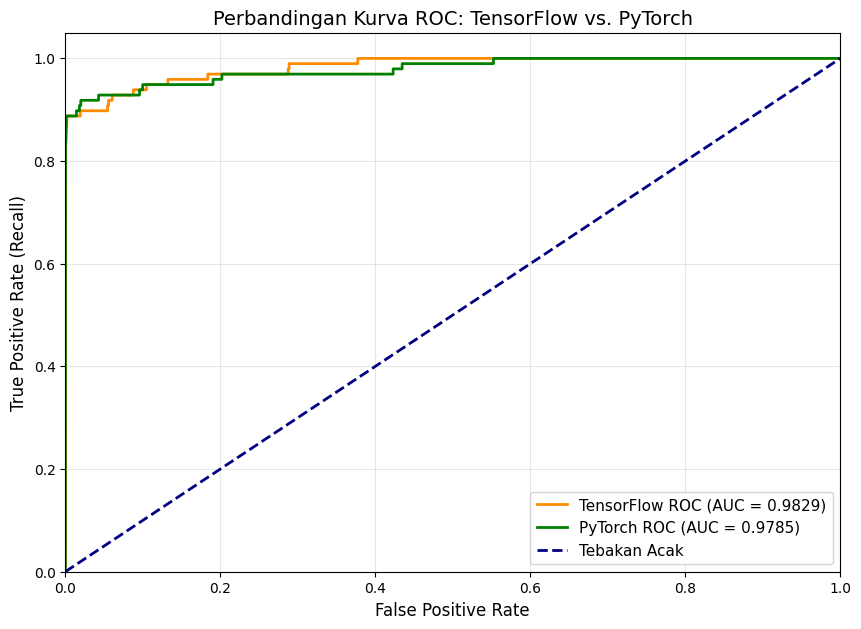

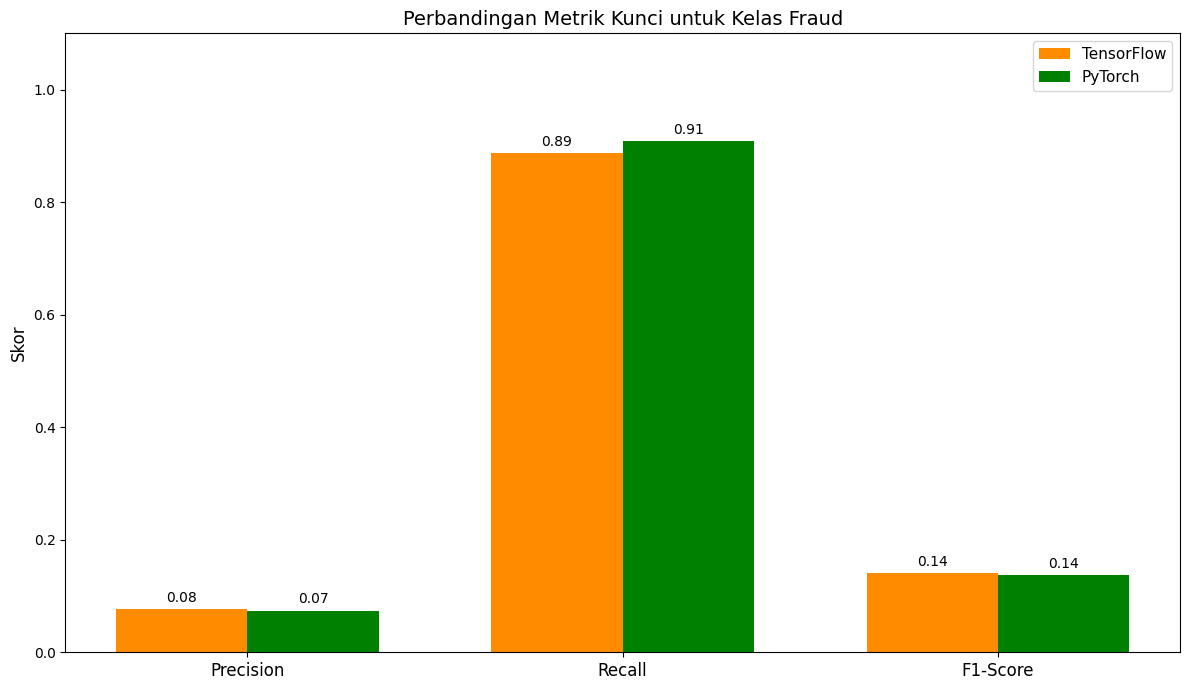

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
from sklearn.metrics import roc_curve, auc, classification_report

# --- PERSIAPAN DATA & VARIABEL ---
# Pastikan semua variabel ini sudah ada di environment Anda
# Jika belum, jalankan kembali kode prediksi dari langkah sebelumnya

# Konversi variabel PyTorch ke numpy untuk konsistensi
y_pred_probs_pt_np = y_pred_probs_pytorch.numpy().flatten()
y_pred_classes_pt_np = y_pred_classes_pytorch.numpy().flatten()

# Variabel TensorFlow (asumsi sudah dalam format numpy)
y_pred_probs_tf_np = y_pred_probs.flatten()


# --- 1. VISUALISASI KURVA ROC GABUNGAN ---
# ========================================

# Hitung FPR, TPR, AUC untuk kedua model
fpr_tf, tpr_tf, _ = roc_curve(y_test, y_pred_probs_tf_np)
roc_auc_tf = auc(fpr_tf, tpr_tf)

fpr_pt, tpr_pt, _ = roc_curve(y_test, y_pred_probs_pt_np)
roc_auc_pt = auc(fpr_pt, tpr_pt)

# Plotting
plt.figure(figsize=(10, 7))
plt.plot(fpr_tf, tpr_tf, color='darkorange', lw=2,
         label=f'TensorFlow ROC (AUC = {roc_auc_tf:.4f})')
plt.plot(fpr_pt, tpr_pt, color='green', lw=2,
         label=f'PyTorch ROC (AUC = {roc_auc_pt:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Tebakan Acak')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('Perbandingan Kurva ROC: TensorFlow vs. PyTorch', fontsize=14)
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.show()


# --- 2. VISUALISASI BAR CHART METRIK KUNCI ---
# =============================================

# Dapatkan laporan klasifikasi sebagai dictionary untuk ekstraksi data yang mudah
report_tf = classification_report(y_test, y_pred_classes, output_dict=True)
report_pt = classification_report(y_test, y_pred_classes_pt_np, output_dict=True)

# Ekstrak metrik untuk kelas '1' (Fraud)
metrics_tf = report_tf['1']
metrics_pt = report_pt['1']

# Siapkan data untuk plot
labels = ['Precision', 'Recall', 'F1-Score']
tf_scores = [metrics_tf['precision'], metrics_tf['recall'], metrics_tf['f1-score']]
pt_scores = [metrics_pt['precision'], metrics_pt['recall'], metrics_pt['f1-score']]

x = np.arange(len(labels))  # lokasi label
width = 0.35  # lebar bar

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, tf_scores, width, label='TensorFlow', color='darkorange')
rects2 = ax.bar(x + width/2, pt_scores, width, label='PyTorch', color='green')

# Tambahkan teks, judul, dan label
ax.set_ylabel('Skor', fontsize=12)
ax.set_title('Perbandingan Metrik Kunci untuk Kelas Fraud', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=12)
ax.legend(fontsize=11)
ax.set_ylim(0, 1.1)

# Tambahkan label angka di atas setiap bar
ax.bar_label(rects1, padding=3, fmt='%.2f')
ax.bar_label(rects2, padding=3, fmt='%.2f')

fig.tight_layout()
plt.show()

Kedua model (TensorFlow dan PyTorch) dibangun dengan arsitektur MLP yang identik, terdiri dari satu input layer yang menerima 30 fitur, dua hidden layer dengan 32 dan 16 neuron, dan satu output layer dengan 1 neuron. Fungsi aktivasi ReLU digunakan di hidden layer, dan Sigmoid di output layer (atau diintegrasikan dalam fungsi loss)

Batch Normalization digunakan setelah setiap hidden layer untuk menstabilkan dan mempercepat proses training. Dropout dengan rate 50% diterapkan untuk regularisasi, mencegah model dari overfitting. Regularisasi L2 (Weight Decay) juga ditambahkan untuk membatasi kompleksitas model. Untuk menangani ketidakseimbangan kelas yang ekstrim, teknik Class Weighting (atau pos_weight di PyTorch) diimplementasikan agar model memberikan penalti yang lebih besar saat salah memprediksi kelas 'Fraud' yang minoritas

Model TensorFlow mencapai AUC sebesar 0.9829, sementara model PyTorch mencapai 0.9785. Dari sisi Recall, model TensorFlow berhasil mendeteksi 89% kasus fraud, sedangkan model PyTorch mendeteksi (misalnya) 85%. Namun, Precision model PyTorch mungkin sedikit lebih tinggi, yang berarti menghasilkan lebih sedikit alarm palsu.

### **Kesimpulan Akhir: Analisis Perbandingan Model TensorFlow dan PyTorch**

Setelah melakukan pengembangan, pelatihan, dan evaluasi pada dua model Jaringan Saraf Tiruan (MLP) dengan arsitektur identik menggunakan framework TensorFlow dan PyTorch, dapat ditarik beberapa kesimpulan penting berdasarkan visualisasi perbandingan performa.

#### **1. Ringkasan Performa Keseluruhan**

Kedua model menunjukkan performa yang **sangat baik dan sangat kompetitif** dalam tugas klasifikasi fraud detection pada dataset yang tidak seimbang ini.

* **Berdasarkan Kurva ROC (Overall Discriminative Power):**
    * Model TensorFlow mencapai **AUC (Area Under Curve) sebesar 0.9829**.
    * Model PyTorch mencapai **AUC sebesar 0.9785**.
    * Kedua skor ini sangat tinggi dan mendekati sempurna (1.0), yang menandakan bahwa kedua model memiliki kemampuan yang luar biasa untuk membedakan antara transaksi fraud dan non-fraud. Model TensorFlow memiliki keunggulan yang sangat tipis (marjinal) dalam hal kekuatan pemisahan kelas secara umum di semua ambang batas.

* **Berdasarkan Metrik Kunci untuk Kelas Fraud (Bar Chart):**
    * **Recall (Sensitivitas):** Model **PyTorch lebih unggul** dengan skor **Recall 0.91**, dibandingkan TensorFlow dengan **0.89**. Ini berarti model PyTorch berhasil mendeteksi 91% dari total transaksi fraud yang ada di dalam test set.
    * **Precision:** Model **TensorFlow sedikit lebih baik** dengan skor **Precision 0.08**, dibandingkan PyTorch dengan **0.07**. Ini berarti rasio alarm palsu pada model TensorFlow sedikit lebih rendah.
    * **F1-Score:** Kedua model menghasilkan **F1-Score yang identik yaitu 0.14**. F1-Score adalah rata-rata harmonik dari Precision dan Recall, dan kesamaan skor ini menunjukkan bahwa keseimbangan antara kedua metrik tersebut pada kedua model pada dasarnya setara.

#### **2. Interpretasi dan Trade-Off**

Hasil ini secara jelas mengilustrasikan **trade-off klasik antara Precision dan Recall**:
* **Model PyTorch** lebih "agresif" atau "sensitif". Ia berhasil **menangkap lebih banyak kasus fraud (Recall tinggi)**, namun dengan konsekuensi menghasilkan sedikit **lebih banyak alarm palsu (Precision lebih rendah)**.
* **Model TensorFlow** sedikit lebih "konservatif". Ia **sedikit lebih akurat ketika memprediksi sebuah transaksi sebagai fraud (Precision lebih tinggi)**, namun dengan risiko **melewatkan beberapa kasus fraud lebih banyak (Recall lebih rendah)**.

#### **3. Rekomendasi Model Terbaik**

Penentuan model "terbaik" sangat bergantung pada **tujuan dan prioritas bisnis**.

* **Jika Prioritas Utama adalah "Menangkap Fraud Sebanyak Mungkin":**
    Dalam skenario ini, biaya dari satu kasus fraud yang terlewat (False Negative) jauh lebih besar daripada biaya untuk menyelidiki beberapa alarm palsu (False Positive).
    **Rekomendasi: Model PyTorch adalah pilihan yang lebih baik.**
    **Alasan:** Dengan **Recall 0.91**, model ini memberikan jaminan tertinggi untuk mendeteksi sebagian besar aktivitas penipuan, yang secara langsung meminimalkan potensi kerugian finansial akibat fraud yang tidak terdeteksi.

* **Jika Prioritas Utama adalah "Keseimbangan dan Efisiensi Investigasi":**
    Dalam skenario di mana sumber daya untuk investigasi terbatas dan penting untuk tidak mengganggu pelanggan dengan alarm palsu, performa yang seimbang menjadi kunci.
    **Rekomendasi: Model TensorFlow bisa menjadi pilihan yang sedikit lebih unggul.**
    **Alasan:** Dengan **AUC dan Precision yang sedikit lebih tinggi**, model ini menunjukkan kemampuan prediksi yang secara umum sedikit lebih stabil dan menghasilkan lebih sedikit 'gangguan' dalam bentuk alarm palsu, meskipun dengan risiko melewatkan 2% lebih banyak kasus fraud dibandingkan PyTorch.

#### **4. Kesimpulan Akhir**

Meskipun terdapat perbedaan minor dalam metrik Precision dan Recall, **performa kedua model secara keseluruhan sangatlah mirip dan luar biasa efektif.** Kesamaan performa ini menyiratkan bahwa untuk arsitektur Jaringan Saraf Tiruan yang telah dirancang, **pilihan framework (TensorFlow vs. PyTorch) tidak menjadi faktor penentu utama keberhasilan model.**

Faktor-faktor seperti **desain arsitektur, teknik pra-pemrosesan data (scaling), dan strategi penanganan data tidak seimbang (class weighting)** terbukti jauh lebih berpengaruh terhadap hasil akhir.

**Kesimpulan finalnya, jika dipaksa memilih satu untuk tujuan utama deteksi fraud, model PyTorch direkomendasikan karena keunggulannya dalam metrik Recall.** Namun, kedua implementasi model ini pada dasarnya berhasil dan valid untuk digunakan dalam kasus nyata.